In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from sklearn.model_selection import train_test_split

In [2]:
all_data = []

In [2]:
#blob

X_training = []
y_training = []
header = []
c = 0
with open("DataSets/blob_att.csv","r") as file:
    r = csv.reader(file)
    for row in r:
        if(c == 0):
            header = row[:-1]
            c+=1
            continue
        X_training.append(row)
        
with open("DataSets/blob_label.csv","r") as file:
    r = csv.reader(file)
    for row in r:
        y_training.append(row)#row[0]!!!

X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.2) # 80% training and 20% testing data
all_data.append([X_train, X_test, y_train, y_test,header])

In [ ]:
#irirs
X_training = []
y_training = []
header = []
c = 0
with open("DataSets/iris.csv","r") as file:
    r = csv.reader(file)
    for row in r:
        if(c == 0):
            header = row[:-1]
            c+=1
            continue
        X_training.append(row[:-1])
        y_training.append(row[-1])
        #print(row)
X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.2) # 80% training and 20% testing data
all_data.append([X_train, X_test, y_train, y_test,header])

In [3]:
#wine
X_training = []
y_training = []
header = []
c = 0
with open("DataSets/winequality-white.csv","r") as file:
    r = csv.reader(file)
    for row in r:
        if(c == 0):
            header = row[:-1]
            c+=1
            continue
        X_training.append(row[:-1])
        y_training.append(row[-1])
        #print(row)
X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.2) # 80% training and 20% testing data
all_data.append([X_train, X_test, y_train, y_test,header])

In [ ]:
#house
X_training = []
y_training = []
header = []
c = 0
with open("DataSets/house_att.csv","r") as file:
    r = csv.reader(file)
    for row in r:
        if(c == 0):
            header = row[:-1]
            c+=1
            continue
        X_training.append(row)
        
with open("DataSets/house_price.csv","r") as file:
    r = csv.reader(file)
    for row in r:
        y_training.append(row)#row[0]!!!

X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.2) # 80% training and 20% testing data
all_data.append([X_train, X_test, y_train, y_test,header])

In [526]:
#Ház ár legenerálása
#Egy mérethez egy árat számítunk


#size: square meter math.sqrt(i+j/10)*7+ 0.2*i)*1000000
#distance from the center 1000/distance +10   dinstance 100-5000 meter
#interest rate 1-10% = -(x**2)/7 +30
#government support yes = 0-10 million



X_training = []
y_training = []
#header = ["size"]
header = ["size","distance","support","salary"]

for i in range(10000):
    
    price = 0
    
    size = random.randint(20,99)+random.randint(0,10)/10
    distance = random.randint(30,100)
    interest_rate = random.randint(1,10)
    support = random.randint(0,10)
    salary = random.randint(3,8)

    price += ((math.sqrt(size)*10+0.3*(size/10)))
    price += (1000/distance + 5)
    #price += (-(interest_rate**2)/7 +30)
    price += support
    price += salary**3
    

    X_training.append([size,distance,support,salary])
    y_training.append(price)
    
X_train = []
y_train = []

X_test = []
y_test = []

#Felosztjuk az adatokat 
X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.2) # 80% training and 20% testing data
print(len(X_train))
print(len(y_train))

8000
8000


In [527]:
#Sorba rendezzük az adathalmazt a méret alapján növekvően

for i in range(len(X_train)):
    temp = i
    for j in range(i,len(X_train)):
        if(X_train[j]<X_train[temp]):
            temp = j
    if(temp != i):
        tmp = X_train[i]
        X_train[i] = X_train[temp]
        X_train[temp] = tmp
        
        tmp = y_train[i]
        y_train[i] = y_train[temp]
        y_train[temp] = tmp

for i in range(len(X_test)):
    temp = i
    for j in range(i,len(X_test)):
        if(X_test[j]<X_test[temp]):
            temp = j
    if(temp != i):
        tmp = X_test[i]
        X_test[i] = X_test[temp]
        X_test[temp] = tmp
        
        tmp = y_test[i]
        y_test[i] = y_test[temp]
        y_test[temp] = tmp



8000
8000


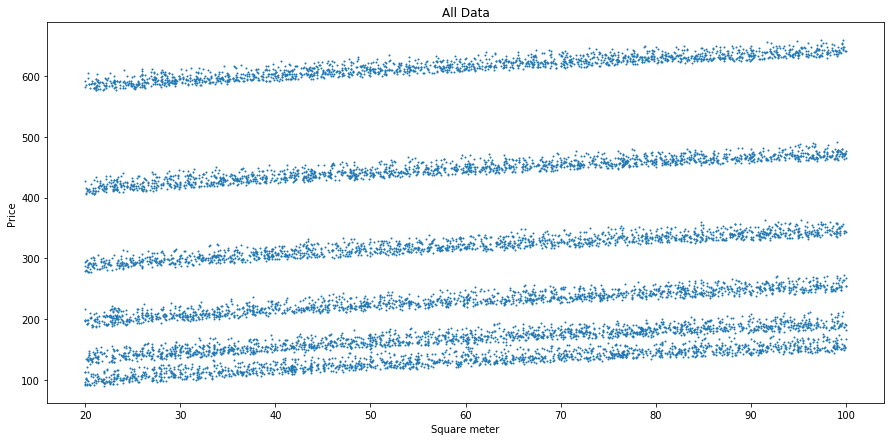

In [528]:
# visualize data set
print(len(X_train))
print(len(y_train))
plt.rcParams["figure.figsize"] = (15,7)
plt.scatter([ X_training[i][0] for i in range(len(X_training)) ],y_training,s=1)

plt.xlabel("Square meter")
plt.ylabel("Price")
plt.title("All Data")

plt.show()

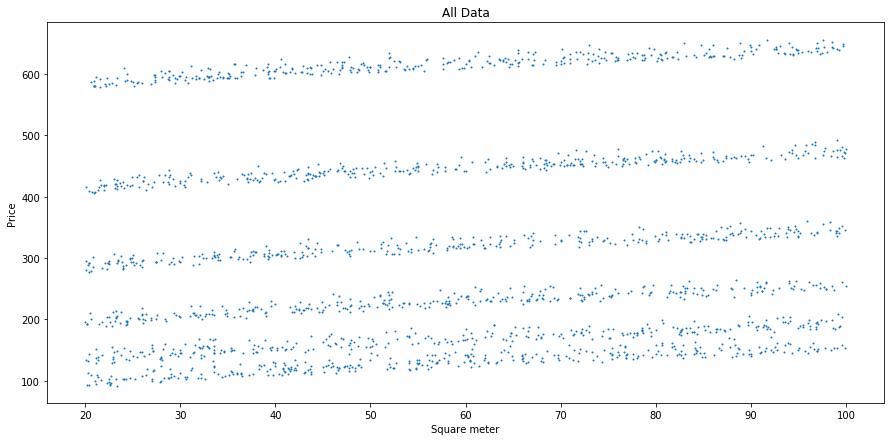

In [529]:
plt.rcParams["figure.figsize"] = (15,7)
plt.scatter([ X_test[i][0] for i in range(len(X_test)) ],y_test,s=1)

plt.xlabel("Square meter")
plt.ylabel("Price")
plt.title("All Data")

plt.show()

In [530]:
def sort_f(X,y,column):
    
    for i in range(len(X)-1):
        temp = i
        for j in range(i,len(X)):
            
            

            if(X[j][column]<X[temp][column]):
                temp = j
        if(temp != i):
            tmp = X[i]
            X[i] = X[temp]
            X[temp] = tmp

            tmp = y[i]
            y[i] = y[temp]
            y[temp] = tmp
    return X,y

In [531]:
class Tree:
    def __init__(self,X,feature_names,labels):
        
        self.X = X
        self.num_of_nodes = 0
        self.currentsplit = 0
        self.split_result = 0
        self.feature_names = feature_names #coloum names
        self.labels = labels#y
        self.catagories = set(labels)
        self.nodes = []
        self.leaf = 0
        

In [532]:
class Node:
    def __init__(self,labels,X,feature_ids):
        
        self.split_result = 0
        self.split = 0 #which column / which feature id
        self.feature_ids = feature_ids
        self.labels = labels
        self.X = X
        self.nodes = []
        self.steps = []
        self.variance = []
        
        self.leaf = 0 #true or false

In [533]:
def get_features(X,labels,column,bottom,top):#return splited data
    
    #get data in a certain range

    sub_label = [labels[x] for x in range(len(labels)) if X[x][column]<top and X[x][column]>=bottom]
    sub_X = [X[x] for x in range(len(X)) if X[x][column]<top and X[x][column]>=bottom]

        
    return [sub_X,sub_label]

In [534]:
def calculate_mse(data):
    
    mean = sum(data)/len(data)
    
    variance = 0
    
    for i in data:
        variance += (i-mean)**2
    
    
    return math.sqrt(variance/len(data))
    

In [535]:
def find_min_distance(sliced_data,column):
    
    dist = 0
    min_dist = -1
    index1 = -1
    index2 = -1
    
    
    for i in range(len(sliced_data)-1):
                
            #print('/////////////////////////////////////////////////')
            #print(sliced_data[i])
            dist = abs(calculate_mse(sliced_data[i][1])-calculate_mse(sliced_data[i+1][1]))
            
            if(min_dist == -1):
                min_dist = dist
                index1 = i
                index2 = i+1
            if(dist<min_dist):
                min_dist = dist
                index1 = i
                index2 = i+1
    
    return index1,index2
    

In [536]:
def merge(sliced_data,column):
    
   

    index1,index2 = find_min_distance(sliced_data,column)
    

    sliced_data[index1][0] = sliced_data[index1][0]+sliced_data[index2][0]
    sliced_data[index1][1] = sliced_data[index1][1]+sliced_data[index2][1]

   
    
    sliced_data.pop(index2)

    return sliced_data

In [537]:
def find_best_split(X,labels,feature_ids,steps):
    
    lowest_v = -1
    split = 0
    split_value = 0
    V = 0 
    
    features = 0 
    svalue = 0
    

   
    
    min_error = -1
    min_sliced_data = []
    min_steps = -1
    min_column = -1

    for column in feature_ids:
            
            X,labels = sort_f(X,labels,column)
            features = [ X[j][column] for j in range(len(X)) ] 
            
            sliced_data = []
            variation = []
            
            dist = abs(features[0]-features[-1])
            
            step = int(dist/10)
            
            if(step < 2):
                step = 1

                if(steps[column] > 3 ):
                    continue

                    
                    
            for k in range(int(features[0]),int(features[-1])+1,step):  

                
                sliced_data.append(get_features(X,labels,column,k,k+step))
                
                if( len(sliced_data[-1][0]) == 0):
                    sliced_data.pop(-1)
                    continue
                
                
                while(len(sliced_data)>3):

                    sliced_data = merge(sliced_data,column)
    
                
                error = 0
                for i in range(len(sliced_data)):
                
                    error += calculate_mse(sliced_data[i][1])
        
                
            
                if(min_error == -1):
                    min_sliced_data = sliced_data

                    min_steps = step
                    min_column = column
                    min_error = error
                    continue
                
                if(error<min_error):
                    min_sliced_data = sliced_data

                    min_error = error
                    min_steps = step
                    min_column = column

        
        
    if(min_steps < 2 and min_steps>=0):
            steps[min_column] += 1
    
    return min_sliced_data,min_column,steps

In [538]:
def build_tree(X,feature_ids,labels,leaf_size,var,depth,steps):
    
    #Két felé bontjuk az adatokat úgy hogy a legkisseb mse kapjuk
    
    split = 0 
    sub_nodes = []
    
    st = steps.copy()
    print(st)
    split_data,column,st = find_best_split(X,labels,feature_ids,st)
    
    for i in split_data:
        
        
        node = Node(i[1],i[0],feature_ids)
        node.split = column   #column
        
        #split point
       
        node.split_result = i[0][-1][column]
        node.depth = depth
        print(i[0])
        print(i[1])
        print( i[0][-1][column])
        node.top = i[0][-1][column]
        node.bottom = i[0][0][column]
        node.steps = st
    
    
        
        
        #Ha egy bizonyos MSE érték alá megyünk vagy elértünk egy bizonyos elemszámot akkor a node-ot leaf-nek nyilvánítjuk
        if(len(node.labels) <= leaf_size or calculate_mse(node.labels)<0.5):

            node.leaf = 1
            
        else:
            node.leaf = 0
            
        sub_nodes.append(node)
    
    if(depth == 3000):
        for i in sub_nodes:
            i.leaf = 1
        return sub_nodes
    
    depth +=1
    
    leaf =  0
    for i in sub_nodes:
        if(i.leaf == 1):
            leaf +=1
            
    if(leaf == len(sub_nodes)):
        return sub_nodes
    
    
    if(sub_nodes[0].leaf == 1 and sub_nodes[1].leaf == 1):
        return sub_nodes
    
    
    
    else:
        for node in sub_nodes:

            if(node.leaf == 0):

                node.nodes = build_tree(node.X,node.feature_ids,node.labels,leaf_size,var,depth,node.steps)


    return sub_nodes   

In [ ]:

def rebuild_tree(X,feature_ids,labels,leaf_size,var,depth,steps,prev_node):
    
    #Két felé bontjuk az adatokat úgy hogy a legkisseb mse kapjuk
    #print(prev_node.depth)
    boundaries = [] # last element of each bach
    
    
    
    split = 0 
    sub_nodes = []
    
    st = steps.copy()
    
    
    split_data,column,st = find_best_split(X,labels,feature_ids,st)
    
    
    rebuild = 0
    
    if(len(prev_node.nodes)>0):
            err_old = 0
            for i in range(len(prev_node.nodes)):
                err_old += calculate_mse(prev_node.labels)
                #err_old += calculate_mse(prev_node.top<X  ,  prev_node.bottom<=X)
                err_old += calculate_error(prev_node.regr,prev_node.nodes[i].X,prev_node.nodes[i].labels,
                                                prev_node.nodes[i].split,0,3)
                err_old += calculate_error(prev_node.nodes[i].regr, split_data[i][0], split_data[i][1],
                                                column, 0, 3)

            err_new = 0
            for i,j in zip(split_data,split_regression):
                err_new += calculate_error(j, i[0], i[1],
                                                column, 0, 3)
                err_new += calculate_error(j, i[0], i[1],
                                                column, 0, 3)

            diff = err_new/err_old
            min_err = min(err_new,err_old)
            print(diff)

            if(diff>0.1 and diff<1 and min_err == err_new):
                rebuild = 1
                #rebuild
    
    
    if(rebuild == 0):
        for node in prev_node.nodes:
                if(node.leaf == 0):
                    node.nodes = rebuild_tree(node.X,node.feature_ids,node.labels,leaf_size,var,depth,node.steps,node)
        
                    
    else:
        for node in prev_node.nodes:
                if(node.leaf == 0):
                    node.nodes = build_tree(prev_node.X,prev_node.feature_ids,prev_node.labels,leaf_size,var,depth,prev_node.steps)
         
    return prev_node.nodes

In [539]:
def inicialize(X,feature_names,labels,leaf_size,var):
    
    depth = 1
    feature_ids = [x for x in range(len(feature_names))]
    tree = Tree(X,feature_names,labels)
    
    steps = []
    for i in feature_ids:
        steps.append(0)
    
    tree.nodes = build_tree(X,feature_ids,labels,leaf_size,var,depth,steps)
    return tree

In [540]:
'''forest = []

#Különböző MSE határokkal építjuk fel a fát
for i in all_data:
    print("-------------------------------------------------------")
    #print("Iteration: %d"%(i))
    tree = inicialize(i[0],i[-1],i[2],10,i,1)
    forest.append(tree)'''

'forest = []\n\n#Különböző MSE határokkal építjuk fel a fát\nfor i in all_data:\n    print("-------------------------------------------------------")\n    #print("Iteration: %d"%(i))\n    tree = inicialize(i[0],i[-1],i[2],10,i,1)\n    forest.append(tree)'

In [542]:
#build_tree(training_data,header,labels)
forest = []
bottom = 1
top = 2
#Különböző MSE határokkal építjuk fel a fát
for i in range(bottom,top):
    print("-------------------------------------------------------")
    print("Iteration: %d"%(i))
    
    tree = inicialize(X_train,header,y_train,10,i)
    forest.append(tree)

-------------------------------------------------------
Iteration: 1
[0, 0, 0, 0]
[[22.0, 30, 0, 3], [95.2, 31, 0, 3], [30.8, 32, 0, 3], [59.6, 33, 0, 3], [32.0, 34, 0, 3], [32.8, 34, 0, 3], [75.9, 34, 0, 3], [82.0, 34, 0, 3], [85.6, 34, 0, 3], [86.4, 34, 0, 3], [87.3, 34, 0, 3], [97.6, 34, 0, 3], [27.5, 36, 0, 3], [60.9, 36, 0, 3], [53.4, 37, 0, 3], [77.7, 38, 0, 3], [20.8, 39, 0, 3], [44.4, 40, 0, 3], [20.1, 40, 0, 3], [52.8, 41, 0, 3], [26.2, 42, 0, 3], [57.3, 43, 0, 3], [65.0, 43, 0, 3], [83.0, 43, 0, 3], [72.0, 44, 0, 3], [76.0, 44, 0, 3], [27.5, 45, 0, 3], [77.2, 45, 0, 3], [43.8, 47, 0, 3], [36.0, 47, 0, 3], [45.1, 48, 0, 3], [58.6, 48, 0, 3], [40.6, 49, 0, 3], [79.4, 49, 0, 3], [83.9, 49, 0, 3], [54.8, 50, 0, 3], [67.1, 52, 0, 3], [33.0, 52, 0, 3], [75.4, 52, 0, 3], [76.5, 52, 0, 3], [91.0, 52, 0, 3], [94.9, 52, 0, 3], [99.9, 52, 0, 3], [63.6, 53, 0, 3], [57.6, 54, 0, 3], [97.5, 55, 0, 3], [56.7, 56, 0, 3], [23.8, 57, 0, 3], [59.5, 57, 0, 3], [63.2, 57, 0, 3], [69.8, 57, 0, 3],

[[22.0, 30, 0, 3], [95.2, 31, 0, 3], [30.8, 32, 0, 3], [59.6, 33, 0, 3], [32.0, 34, 0, 3], [32.8, 34, 0, 3], [75.9, 34, 0, 3], [82.0, 34, 0, 3], [85.6, 34, 0, 3], [86.4, 34, 0, 3], [87.3, 34, 0, 3], [97.6, 34, 0, 3], [27.5, 36, 0, 3], [60.9, 36, 0, 3], [53.4, 37, 0, 3], [77.7, 38, 0, 3], [20.8, 39, 0, 3], [20.1, 40, 0, 3], [44.4, 40, 0, 3], [52.8, 41, 0, 3], [26.2, 42, 0, 3], [57.3, 43, 0, 3], [65.0, 43, 0, 3], [83.0, 43, 0, 3], [72.0, 44, 0, 3], [76.0, 44, 0, 3], [27.5, 45, 0, 3], [77.2, 45, 0, 3], [43.8, 47, 0, 3], [36.0, 47, 0, 3], [45.1, 48, 0, 3], [58.6, 48, 0, 3], [79.4, 49, 0, 3], [83.9, 49, 0, 3], [40.6, 49, 0, 3], [54.8, 50, 0, 3], [67.1, 52, 0, 3], [75.4, 52, 0, 3], [76.5, 52, 0, 3], [91.0, 52, 0, 3], [94.9, 52, 0, 3], [33.0, 52, 0, 3], [99.9, 52, 0, 3], [63.6, 53, 0, 3], [57.6, 54, 0, 3], [97.5, 55, 0, 3], [56.7, 56, 0, 3], [59.5, 57, 0, 3], [63.2, 57, 0, 3], [69.8, 57, 0, 3], [76.3, 57, 0, 3], [23.8, 57, 0, 3], [73.1, 58, 0, 3], [75.6, 58, 0, 3], [42.1, 60, 0, 3], [35.5, 62

[[20.0, 79, 2, 3], [20.0, 85, 4, 3], [20.0, 72, 5, 3], [20.0, 36, 7, 3], [20.0, 40, 10, 3], [20.1, 40, 0, 3], [20.1, 52, 5, 3], [20.1, 70, 9, 3], [20.2, 69, 0, 3], [20.2, 70, 8, 3], [20.2, 30, 10, 3], [20.3, 71, 6, 3], [20.5, 74, 0, 3], [20.5, 98, 3, 3], [20.6, 44, 5, 3], [20.7, 69, 2, 3], [20.8, 39, 0, 3], [20.8, 41, 6, 3], [20.9, 99, 2, 3], [20.9, 64, 3, 3], [21.0, 36, 2, 3], [21.1, 70, 5, 3], [21.2, 49, 5, 3], [21.4, 48, 2, 3], [21.4, 79, 7, 3], [21.5, 69, 9, 3], [21.7, 88, 7, 3], [21.8, 73, 5, 3], [21.8, 96, 8, 3], [21.9, 61, 4, 3], [21.9, 61, 5, 3], [21.9, 98, 6, 3], [22.0, 92, 0, 3], [22.0, 30, 0, 3], [22.0, 83, 3, 3], [22.0, 58, 4, 3], [22.0, 38, 5, 3], [22.0, 94, 5, 3], [22.0, 40, 10, 3], [22.1, 69, 0, 3], [22.1, 90, 4, 3], [22.2, 63, 2, 3], [22.2, 49, 5, 3], [22.3, 33, 5, 3], [22.3, 32, 7, 3], [22.5, 70, 2, 3], [22.5, 70, 4, 3], [22.7, 96, 10, 3], [22.9, 81, 0, 3], [22.9, 87, 1, 3], [22.9, 96, 7, 3], [22.9, 54, 10, 3], [23.0, 68, 3, 3], [23.0, 57, 6, 3], [23.0, 38, 7, 3], [23.

[[20.0, 79, 2, 3], [20.0, 85, 4, 3], [20.0, 72, 5, 3], [20.0, 36, 7, 3], [20.0, 40, 10, 3], [20.1, 40, 0, 3], [20.1, 52, 5, 3], [20.1, 70, 9, 3], [20.2, 69, 0, 3], [20.2, 70, 8, 3], [20.2, 30, 10, 3], [20.3, 71, 6, 3], [20.5, 74, 0, 3], [20.5, 98, 3, 3], [20.6, 44, 5, 3], [20.7, 69, 2, 3], [20.8, 39, 0, 3], [20.8, 41, 6, 3], [20.9, 99, 2, 3], [20.9, 64, 3, 3], [21.0, 36, 2, 3], [21.1, 70, 5, 3], [21.2, 49, 5, 3], [21.4, 48, 2, 3], [21.4, 79, 7, 3], [21.5, 69, 9, 3], [21.7, 88, 7, 3], [21.8, 73, 5, 3], [21.8, 96, 8, 3], [21.9, 61, 4, 3], [21.9, 61, 5, 3], [21.9, 98, 6, 3], [22.0, 92, 0, 3], [22.0, 30, 0, 3], [22.0, 83, 3, 3], [22.0, 58, 4, 3], [22.0, 38, 5, 3], [22.0, 94, 5, 3], [22.0, 40, 10, 3], [22.1, 69, 0, 3], [22.1, 90, 4, 3], [22.2, 63, 2, 3], [22.2, 49, 5, 3], [22.3, 33, 5, 3], [22.3, 32, 7, 3], [22.5, 70, 2, 3], [22.5, 70, 4, 3], [22.7, 96, 10, 3], [22.9, 81, 0, 3], [22.9, 87, 1, 3], [22.9, 96, 7, 3], [22.9, 54, 10, 3], [23.0, 68, 3, 3], [23.0, 57, 6, 3], [23.0, 38, 7, 3], [23.

[[31.9, 76, 1, 3], [31.8, 78, 5, 3], [33.3, 79, 0, 3], [34.1, 79, 4, 3], [34.3, 79, 6, 3], [31.9, 81, 1, 3], [31.3, 84, 1, 3], [31.9, 84, 0, 3], [34.8, 84, 3, 3]]
[103.59497972261386, 107.16600153999956, 103.3633800331153, 108.07643313072701, 110.25342970548655, 102.78276399811743, 101.79016482755937, 101.34184689053366, 106.94028671977239]
84
[[31.0, 85, 6, 3]]
[106.37234951065315]
85
[[33.1, 92, 6, 3], [33.3, 92, 0, 3]]
[107.39516467196141, 101.57471740240534]
92
[1, 0, 0, 2]
[[38.5, 94, 0, 3]]
[105.84166610229471]
0
[[36.9, 76, 1, 3], [39.7, 77, 1, 3], [36.5, 79, 1, 3], [38.1, 88, 1, 3], [36.9, 95, 1, 3], [38.0, 74, 2, 3], [38.8, 87, 2, 3], [38.0, 73, 3, 3], [37.3, 80, 3, 3], [36.1, 72, 3, 3], [36.5, 78, 4, 3], [38.6, 84, 4, 3], [39.3, 90, 4, 3], [36.6, 95, 5, 3], [38.6, 89, 6, 3], [36.5, 93, 6, 3], [36.6, 76, 6, 3], [37.7, 96, 6, 3], [38.6, 96, 6, 3], [37.2, 95, 7, 3], [38.4, 95, 7, 3], [36.5, 82, 7, 3], [36.3, 77, 7, 3], [39.8, 74, 7, 3]]
[108.01026493079186, 110.18594899510644, 1

[[63.0, 44, 7, 3], [63.5, 47, 3, 3], [63.8, 48, 6, 3], [61.1, 49, 5, 3], [61.7, 52, 10, 3], [63.6, 53, 0, 3], [62.6, 56, 8, 3], [63.2, 57, 0, 3]]
[142.98981205921044, 137.86848299722698, 140.62223552419675, 137.40765224875733, 141.63111677739116, 132.52553267780942, 138.85530463655277, 130.93828730652996]
57
[[63.9, 59, 2, 3]]
[132.80362810921827]
59
[[61.8, 60, 5, 3], [63.2, 61, 10, 3], [62.5, 64, 3, 3], [63.8, 64, 7, 3], [61.0, 65, 1, 3], [61.0, 66, 9, 3], [61.2, 67, 3, 3], [61.3, 67, 10, 3]]
[134.13364269480087, 139.787870280358, 131.55694150420948, 136.41390219086344, 128.31711214368192, 136.0840119105817, 129.99180199676013, 137.0586896585819]
67
[0, 0, 0, 2]
[[51.2, 72, 10, 3], [51.4, 73, 10, 3]]
[128.97906416888216, 128.93442345272598]
51.4
[[53.0, 73, 5, 3], [53.8, 73, 9, 3], [54.2, 71, 5, 3], [54.5, 71, 4, 3], [54.9, 72, 10, 3], [56.4, 70, 10, 3], [57.9, 73, 6, 3], [59.0, 72, 3, 3], [59.4, 69, 4, 3], [59.4, 71, 3, 3], [59.9, 70, 8, 3], [60.0, 70, 8, 3], [60.9, 69, 4, 3], [61.1

[[83.5, 30, 4, 3], [84.4, 30, 10, 3], [94.5, 30, 5, 3], [96.0, 30, 3, 3], [97.6, 30, 8, 3], [90.3, 31, 2, 3], [92.3, 31, 9, 3], [93.0, 31, 4, 3], [95.2, 31, 0, 3], [99.3, 31, 6, 3], [83.1, 32, 3, 3], [84.9, 32, 7, 3], [85.2, 32, 10, 3], [96.6, 32, 1, 3], [97.7, 32, 7, 3], [85.1, 33, 10, 3], [86.6, 33, 9, 3], [90.0, 33, 7, 3], [81.0, 33, 9, 3], [95.4, 33, 6, 3], [97.6, 33, 6, 3], [85.6, 34, 0, 3], [86.4, 34, 0, 3], [87.3, 34, 0, 3], [87.9, 34, 6, 3], [90.3, 34, 5, 3], [92.0, 34, 8, 3], [96.0, 34, 5, 3], [97.6, 34, 0, 3], [98.0, 34, 7, 3], [82.0, 34, 0, 3], [95.5, 36, 5, 3], [84.8, 36, 2, 3], [97.9, 36, 3, 3], [98.9, 36, 7, 3], [88.4, 37, 3, 3], [97.1, 37, 6, 3], [90.6, 38, 4, 3], [94.8, 38, 5, 3], [84.1, 39, 3, 3], [80.7, 39, 10, 3], [91.1, 39, 1, 3], [99.1, 39, 5, 3], [85.5, 40, 9, 3], [80.4, 40, 9, 3], [98.0, 40, 7, 3], [89.4, 41, 4, 3], [90.8, 41, 2, 3], [90.8, 41, 2, 3], [92.0, 41, 6, 3], [92.0, 41, 2, 3], [94.8, 41, 10, 3], [94.9, 41, 6, 3], [85.2, 41, 6, 3], [80.6, 41, 8, 3]]
[163

[[98.5, 76, 0, 3]]
[147.36006094323812]
76
[[96.3, 80, 2, 3], [98.0, 80, 2, 3], [96.6, 81, 7, 3], [98.0, 83, 2, 3], [98.1, 86, 1, 3], [97.8, 87, 2, 3], [96.2, 88, 2, 3], [97.0, 91, 2, 3], [99.5, 91, 4, 3], [95.7, 94, 7, 3], [99.1, 94, 6, 3], [99.7, 94, 7, 3], [99.5, 95, 5, 3], [98.7, 96, 0, 3], [97.3, 96, 7, 3], [96.7, 97, 2, 3]]
[147.52156340277674, 148.43494936611665, 152.5289780147906, 147.98314213720099, 146.61635109205923, 147.32213539417216, 146.3312350455502, 146.387589006972, 149.723697705311, 150.33567468350523, 151.16028079029897, 152.47918520327335, 150.26100250577372, 144.725540322825, 150.97642903192823, 145.54643650203164]
97
[[95.2, 99, 4, 3], [96.4, 99, 0, 3]]
[146.52749744221384, 143.17651177007872]
99
[0, 0, 1, 2]
[[95.7, 94, 7, 3]]
[150.33567468350523]
95.7
[[96.2, 88, 2, 3], [96.3, 80, 2, 3], [96.6, 81, 7, 3], [96.7, 97, 2, 3]]
[146.3312350455502, 147.52156340277674, 152.5289780147906, 145.54643650203164]
96.7
[[97.0, 91, 2, 3], [97.3, 96, 7, 3], [97.8, 87, 2, 3], [

[[20.2, 78, 6, 4], [20.2, 95, 9, 4], [20.3, 57, 5, 4], [20.3, 75, 2, 4], [20.4, 38, 0, 4], [20.4, 37, 5, 4], [20.4, 56, 8, 4], [20.5, 92, 9, 4], [20.5, 55, 3, 4], [20.5, 95, 0, 4], [20.5, 51, 0, 4], [20.6, 74, 5, 4], [20.6, 80, 5, 4], [20.7, 70, 4, 4], [20.7, 98, 4, 4], [20.7, 71, 1, 4], [20.8, 40, 6, 4], [20.8, 76, 7, 4], [20.9, 43, 3, 4], [21.0, 45, 6, 4], [21.0, 52, 3, 4], [21.0, 67, 10, 4], [21.1, 99, 4, 4], [21.2, 34, 4, 4], [21.2, 67, 7, 4], [21.3, 62, 3, 4], [21.3, 52, 10, 4], [21.4, 89, 0, 4], [21.4, 96, 2, 4], [21.4, 76, 9, 4], [21.6, 44, 6, 4], [21.7, 39, 4, 4], [21.7, 30, 5, 4], [21.8, 95, 4, 4], [22.0, 48, 7, 4], [22.0, 37, 1, 4], [22.2, 54, 4, 4], [22.2, 49, 2, 4], [22.3, 31, 0, 4], [22.5, 89, 1, 4], [22.7, 100, 3, 4], [22.8, 74, 1, 4], [22.8, 44, 0, 4], [22.8, 93, 9, 4], [22.9, 37, 6, 4], [23.0, 85, 6, 4], [23.0, 100, 2, 4], [23.0, 32, 0, 4], [23.1, 62, 2, 4], [23.3, 33, 1, 4], [23.4, 39, 6, 4], [23.6, 43, 0, 4], [23.7, 93, 4, 4], [23.9, 66, 6, 4], [24.0, 62, 2, 4], [24.0

[[35.0, 30, 5, 4], [37.7, 30, 0, 4], [48.3, 30, 9, 4], [51.3, 31, 0, 4], [55.6, 31, 1, 4], [57.9, 31, 0, 4], [35.3, 32, 8, 4], [37.8, 32, 4, 4], [39.5, 32, 9, 4], [42.5, 32, 5, 4], [47.0, 32, 7, 4], [49.8, 32, 1, 4], [50.0, 32, 3, 4], [51.1, 32, 0, 4], [52.1, 32, 10, 4], [57.2, 32, 6, 4], [58.5, 32, 7, 4], [59.6, 32, 5, 4], [37.3, 33, 6, 4], [38.0, 33, 5, 4], [42.6, 33, 10, 4], [45.7, 33, 6, 4], [52.1, 33, 1, 4], [44.2, 34, 5, 4], [45.2, 34, 4, 4], [50.0, 34, 2, 4], [50.4, 34, 0, 4], [54.2, 34, 9, 4], [55.8, 34, 4, 4], [58.1, 34, 0, 4], [37.2, 35, 4, 4], [37.4, 35, 2, 4], [42.3, 35, 6, 4], [50.5, 35, 5, 4], [51.9, 35, 9, 4], [52.6, 35, 5, 4], [55.9, 35, 3, 4], [59.1, 35, 5, 4], [35.7, 36, 0, 4], [42.4, 36, 0, 4], [43.9, 36, 5, 4], [48.4, 36, 2, 4], [51.2, 36, 9, 4], [54.2, 36, 3, 4], [58.1, 36, 8, 4], [40.4, 37, 5, 4], [44.9, 37, 4, 4], [46.9, 37, 7, 4], [36.1, 37, 6, 4], [56.6, 37, 5, 4], [57.2, 37, 1, 4], [59.0, 37, 0, 4], [39.7, 38, 8, 4], [40.8, 38, 0, 4], [41.1, 38, 4, 4], [50.0, 

[[63.5, 30, 9, 4], [69.0, 30, 5, 4], [75.8, 30, 0, 4], [67.9, 31, 8, 4], [70.5, 31, 8, 4], [72.0, 31, 3, 4], [72.7, 31, 0, 4], [63.3, 32, 10, 4], [63.5, 32, 3, 4], [66.0, 32, 8, 4], [74.9, 32, 0, 4], [75.9, 32, 7, 4], [67.0, 33, 4, 4], [71.0, 33, 5, 4], [67.4, 34, 0, 4], [61.3, 34, 8, 4], [70.0, 34, 5, 4], [67.2, 35, 0, 4], [61.6, 35, 6, 4], [65.5, 35, 2, 4], [71.2, 35, 7, 4], [71.9, 35, 8, 4], [72.1, 35, 1, 4], [63.0, 35, 1, 4], [74.4, 35, 3, 4], [74.6, 35, 5, 4]]
[192.9252205858795, 192.46957196251407, 191.670528772049, 193.6965208139397, 195.33734263486235, 191.27087825851473, 188.70335950529787, 191.71029712366436, 184.84188725254614, 191.4703840463596, 189.04178609367523, 196.647606058498, 187.1665580217548, 190.6945280347939, 182.53126771297752, 186.54508123013588, 189.1777673592899, 181.56303469910537, 183.9050960528229, 182.4684988526218, 191.08752101034452, 192.52229627422886, 185.6461474328437, 179.83396790336627, 189.0588631828199, 191.1807200981853]
35
[[72.7, 36, 6, 4]]
[1

[[89.1, 30, 6, 4], [90.0, 30, 9, 4], [96.2, 30, 8, 4], [99.2, 30, 1, 4], [84.9, 31, 4, 4], [85.5, 31, 1, 4], [87.5, 31, 8, 4], [90.2, 31, 3, 4], [92.5, 31, 0, 4], [99.7, 31, 8, 4], [83.7, 32, 9, 4], [93.5, 32, 10, 4], [83.0, 32, 1, 4], [86.8, 33, 2, 4], [96.0, 33, 9, 4], [85.8, 34, 5, 4], [93.1, 34, 3, 4], [89.8, 35, 1, 4], [85.2, 36, 2, 4], [86.5, 36, 9, 4], [87.9, 36, 8, 4], [93.8, 36, 0, 4], [95.6, 36, 6, 4], [95.6, 36, 9, 4], [97.0, 36, 1, 4], [84.0, 37, 10, 4], [98.4, 37, 10, 4], [83.4, 37, 5, 4], [92.1, 38, 2, 4], [92.5, 38, 9, 4], [88.1, 39, 10, 4], [91.0, 39, 3, 4], [85.6, 40, 7, 4], [87.0, 40, 10, 4], [85.0, 41, 2, 4], [83.1, 41, 9, 4], [85.7, 41, 10, 4], [87.4, 41, 3, 4], [87.7, 41, 2, 4], [97.0, 41, 7, 4], [99.1, 41, 8, 4], [89.9, 42, 10, 4], [94.3, 42, 4, 4], [98.5, 42, 1, 4], [93.1, 43, 8, 4], [83.5, 43, 6, 4], [94.2, 43, 3, 4], [94.9, 43, 1, 4], [98.8, 43, 9, 4], [83.0, 44, 5, 4], [93.8, 44, 7, 4], [85.4, 44, 10, 4], [99.2, 44, 3, 4], [85.7, 45, 10, 4], [90.9, 45, 10, 4],

[[20.0, 53, 4, 5], [20.0, 55, 5, 5], [20.0, 31, 9, 5], [20.2, 79, 10, 5], [20.3, 89, 7, 5], [20.3, 69, 8, 5], [20.5, 45, 4, 5], [20.6, 57, 9, 5], [20.7, 86, 2, 5], [20.7, 89, 0, 5], [20.7, 69, 0, 5], [20.8, 96, 1, 5], [20.9, 72, 8, 5], [20.9, 45, 10, 5], [21.0, 62, 8, 5], [21.0, 55, 2, 5], [21.0, 64, 4, 5], [21.1, 84, 0, 5], [21.1, 99, 0, 5], [21.1, 35, 4, 5], [21.2, 58, 9, 5], [21.2, 64, 7, 5], [21.2, 79, 10, 5], [21.3, 60, 1, 5], [21.5, 51, 8, 5], [21.5, 73, 6, 5], [21.5, 98, 2, 5], [21.9, 36, 0, 5], [22.0, 94, 7, 5], [22.0, 51, 8, 5], [22.0, 69, 0, 5], [22.0, 32, 2, 5], [22.1, 56, 8, 5], [22.2, 100, 4, 5], [22.2, 37, 1, 5], [22.3, 89, 1, 5], [22.3, 86, 0, 5], [22.3, 58, 9, 5], [22.4, 97, 3, 5], [22.4, 82, 1, 5], [22.5, 46, 5, 5], [22.6, 33, 7, 5], [22.6, 42, 2, 5], [22.6, 37, 1, 5], [22.7, 67, 1, 5], [22.7, 35, 9, 5], [22.7, 70, 10, 5], [22.7, 39, 1, 5], [22.8, 85, 8, 5], [22.8, 52, 4, 5], [22.8, 98, 6, 5], [22.8, 32, 7, 5], [22.8, 30, 10, 5], [22.8, 99, 3, 5], [22.9, 48, 5, 5], [22

[0, 0, 0, 2]
[[23.5, 64, 0, 5], [20.7, 69, 0, 5], [22.0, 69, 0, 5], [25.0, 66, 1, 5], [22.7, 67, 1, 5], [24.0, 68, 1, 5], [21.0, 64, 4, 5], [21.2, 64, 7, 5]]
[194.80679857416328, 190.6110062874977, 192.0569112214227, 196.90151515151516, 194.25089013261473, 195.41567720860473, 196.0807569495584, 199.30445773288534]
7
[[20.3, 69, 8, 5], [23.3, 66, 9, 5], [25.6, 66, 9, 5]]
[198.15727492746365, 203.12058869610382, 205.5159577142092]
9
[[23.6, 65, 10, 5]]
[204.67244659057985]
10
[0, 0, 0, 2]
[[20.9, 72, 8, 5], [23.0, 72, 2, 5], [21.5, 73, 6, 5], [23.4, 73, 7, 5], [23.3, 74, 10, 5], [23.5, 74, 8, 5], [23.8, 74, 7, 5], [24.8, 76, 4, 5], [24.0, 77, 4, 5], [23.1, 78, 4, 5], [20.2, 79, 10, 5], [21.2, 79, 10, 5]]
[198.23240669153876, 194.53720412201608, 196.71172261446483, 199.7741766267776, 202.48258705810218, 200.69531208767683, 200.0127571841154, 197.70149312879704, 196.69680784267655, 195.5759721833045, 198.2086379565897, 199.3376855809866]
79
[[23.2, 81, 10, 5], [22.4, 82, 1, 5], [25.5, 82, 

[[39.5, 34, 5, 5], [40.1, 34, 2, 5], [41.2, 34, 10, 5], [39.6, 36, 8, 5], [40.2, 39, 3, 5], [39.2, 40, 10, 5], [40.3, 41, 9, 5], [40.9, 43, 6, 5], [40.2, 44, 8, 5], [40.0, 45, 3, 5], [39.6, 45, 8, 5]]
[228.44579015576502, 225.9393255018326, 234.8349908494072, 229.89430866798688, 223.25049557761508, 228.78590336999412, 228.08152489485454, 224.4359217747663, 225.33674266386217, 219.6677754255898, 224.3387531124313]
45
[[39.3, 46, 3, 5], [42.7, 46, 0, 5], [39.6, 48, 2, 5], [40.0, 51, 7, 5], [40.4, 54, 4, 5], [40.0, 55, 6, 5], [40.5, 57, 10, 5], [42.4, 57, 6, 5]]
[218.60784250941254, 218.36536744560078, 216.94986422354242, 221.0533963406225, 217.2915128468013, 218.62737138518577, 222.3984699559121, 219.93114203352164]
57
[[39.2, 60, 10, 5], [39.4, 62, 0, 5], [40.0, 62, 0, 5]]
[220.4525700366608, 210.08045156396537, 210.5745854614321]
62
[1, 0, 0, 2]
[[40.1, 34, 2, 5]]
[225.9393255018326]
2
[[40.2, 39, 3, 5], [40.0, 45, 3, 5], [39.5, 34, 5, 5], [40.9, 43, 6, 5], [39.6, 36, 8, 5], [40.2, 44,

[[82.3, 30, 0, 5], [85.4, 30, 1, 5], [59.4, 31, 4, 5], [59.9, 31, 6, 5], [61.0, 31, 3, 5], [66.2, 31, 10, 5], [84.7, 31, 7, 5], [84.7, 31, 3, 5], [58.0, 32, 8, 5], [64.7, 32, 4, 5], [67.2, 32, 10, 5], [72.0, 32, 6, 5], [82.4, 32, 6, 5], [82.8, 32, 5, 5], [85.0, 32, 5, 5], [65.0, 33, 3, 5], [67.1, 33, 0, 5], [70.2, 33, 3, 5], [70.5, 33, 7, 5], [73.2, 33, 8, 5], [74.3, 33, 0, 5], [76.0, 33, 0, 5], [77.7, 33, 3, 5], [85.0, 33, 1, 5], [68.3, 34, 2, 5], [68.4, 34, 3, 5], [70.0, 34, 5, 5], [70.2, 34, 8, 5], [73.5, 34, 5, 5], [78.1, 34, 10, 5], [86.5, 34, 7, 5], [87.1, 34, 6, 5], [63.0, 35, 9, 5], [66.4, 35, 6, 5], [69.3, 35, 3, 5], [70.0, 35, 7, 5], [57.5, 35, 8, 5], [71.4, 35, 7, 5], [71.9, 35, 4, 5], [76.8, 35, 9, 5], [78.8, 35, 0, 5], [80.3, 35, 1, 5], [82.8, 35, 1, 5], [84.1, 35, 10, 5], [86.2, 35, 7, 5], [86.5, 35, 9, 5], [59.3, 36, 3, 5], [60.6, 36, 9, 5], [62.4, 36, 9, 5], [62.8, 36, 1, 5], [69.0, 36, 3, 5], [69.5, 36, 1, 5], [80.0, 36, 0, 5], [80.4, 36, 5, 5], [81.3, 36, 10, 5], [82.

[[56.1, 85, 1, 5], [56.1, 86, 8, 5], [56.1, 87, 7, 5], [56.1, 91, 1, 5], [56.2, 83, 5, 5], [56.3, 73, 10, 5], [56.4, 84, 6, 5], [56.5, 84, 3, 5], [56.5, 91, 10, 5], [56.8, 77, 5, 5], [56.9, 96, 6, 5], [57.4, 75, 10, 5], [57.9, 74, 7, 5], [57.9, 77, 0, 5], [58.4, 75, 4, 5], [58.9, 96, 5, 5], [59.1, 82, 10, 5], [59.4, 75, 8, 5], [59.7, 83, 8, 5], [59.8, 73, 8, 5], [59.8, 78, 3, 5], [59.8, 87, 1, 5], [59.8, 92, 4, 5], [59.8, 73, 3, 5], [60.1, 99, 1, 5], [60.2, 73, 3, 5], [60.2, 74, 5, 5], [61.0, 77, 2, 5], [61.2, 93, 4, 5], [61.2, 95, 7, 5], [61.6, 89, 7, 5], [61.6, 96, 5, 5], [62.0, 75, 8, 5], [62.0, 95, 9, 5], [62.2, 94, 3, 5], [62.3, 98, 8, 5], [62.4, 74, 2, 5], [62.7, 98, 8, 5], [62.8, 82, 4, 5], [62.8, 96, 4, 5], [63.3, 82, 7, 5], [63.7, 88, 6, 5], [64.0, 78, 2, 5], [64.0, 86, 2, 5], [64.0, 88, 0, 5], [64.1, 90, 1, 5], [64.2, 82, 7, 5], [64.3, 77, 4, 5], [64.3, 73, 3, 5], [64.6, 81, 5, 5], [64.6, 95, 8, 5], [64.8, 94, 2, 5], [65.0, 83, 2, 5], [65.0, 89, 5, 5], [65.3, 93, 0, 5], [65.5

[[37.6, 30, 0, 6], [62.7, 30, 0, 6], [75.0, 30, 0, 6], [90.7, 31, 0, 6], [89.5, 32, 0, 6], [84.0, 33, 0, 6], [63.9, 35, 0, 6], [72.0, 35, 0, 6], [84.0, 35, 0, 6], [52.9, 36, 0, 6], [53.8, 36, 0, 6], [98.0, 36, 0, 6], [27.3, 37, 0, 6], [79.0, 37, 0, 6], [92.1, 37, 0, 6], [21.0, 40, 0, 6], [80.0, 40, 0, 6], [48.1, 42, 0, 6], [31.8, 42, 0, 6], [31.9, 42, 0, 6], [94.3, 42, 0, 6], [83.1, 43, 0, 6], [20.6, 44, 0, 6], [81.3, 44, 0, 6], [64.6, 45, 0, 6], [30.6, 46, 0, 6], [51.4, 46, 0, 6], [24.8, 46, 0, 6], [52.5, 47, 0, 6], [58.3, 47, 0, 6], [80.5, 47, 0, 6], [87.0, 47, 0, 6], [52.7, 48, 0, 6], [61.8, 49, 0, 6], [83.0, 49, 0, 6], [25.2, 53, 0, 6], [57.1, 55, 0, 6], [92.8, 55, 0, 6], [64.5, 56, 0, 6], [58.0, 57, 0, 6], [67.0, 58, 0, 6], [41.0, 60, 0, 6], [80.5, 60, 0, 6], [38.3, 61, 0, 6], [66.4, 62, 0, 6], [90.0, 62, 0, 6], [97.0, 62, 0, 6], [76.8, 63, 0, 6], [72.8, 64, 0, 6], [28.9, 64, 0, 6], [57.9, 64, 0, 6], [41.3, 66, 0, 6], [41.9, 68, 0, 6], [57.2, 68, 0, 6], [60.0, 68, 0, 6], [82.6, 68

[[20.0, 89, 1, 6], [20.0, 43, 5, 6], [20.0, 89, 9, 6], [20.2, 94, 1, 6], [20.2, 43, 7, 6], [20.2, 95, 8, 6], [20.3, 97, 1, 6], [20.3, 47, 2, 6], [20.3, 99, 8, 6], [20.5, 75, 2, 6], [20.5, 61, 9, 6], [20.6, 44, 0, 6], [20.6, 40, 8, 6], [20.7, 51, 1, 6], [20.8, 61, 6, 6], [20.8, 61, 8, 6], [20.9, 65, 1, 6], [20.9, 47, 8, 6], [20.9, 64, 8, 6], [20.9, 42, 10, 6], [21.0, 40, 0, 6], [21.1, 68, 6, 6], [21.3, 99, 5, 6], [21.4, 31, 6, 6], [21.5, 96, 4, 6], [21.6, 75, 1, 6], [21.7, 47, 4, 6], [21.7, 45, 5, 6], [21.7, 47, 10, 6], [21.8, 66, 3, 6], [21.9, 44, 2, 6], [21.9, 38, 5, 6], [22.0, 43, 4, 6], [22.0, 63, 4, 6], [22.0, 92, 6, 6], [22.1, 53, 5, 6], [22.2, 40, 4, 6], [22.2, 77, 4, 6], [22.4, 81, 9, 6], [22.5, 41, 4, 6], [22.6, 93, 9, 6], [22.6, 100, 9, 6], [22.7, 76, 6, 6], [22.8, 89, 0, 6], [22.8, 36, 3, 6], [23.2, 85, 0, 6], [23.3, 68, 5, 6], [23.3, 65, 7, 6], [23.6, 91, 2, 6], [23.6, 94, 6, 6], [23.6, 90, 7, 6], [23.7, 66, 1, 6], [23.7, 76, 8, 6], [23.8, 66, 4, 6], [23.8, 49, 8, 6], [23.9,

[[28.0, 72, 1, 6], [28.0, 54, 3, 6], [28.0, 32, 4, 6], [28.0, 99, 10, 6], [28.1, 36, 10, 6], [28.2, 78, 6, 6], [28.3, 43, 1, 6], [28.3, 35, 1, 6], [28.3, 49, 5, 6], [28.3, 73, 8, 6], [28.6, 58, 6, 6], [28.7, 67, 8, 6], [28.8, 50, 1, 6], [28.9, 64, 0, 6], [29.0, 46, 1, 6], [29.0, 40, 5, 6], [29.1, 68, 4, 6], [29.1, 48, 4, 6], [29.2, 88, 5, 6], [29.3, 31, 4, 6], [29.3, 33, 6, 6], [29.4, 73, 0, 6], [29.5, 74, 2, 6], [29.5, 100, 0, 6], [29.5, 35, 9, 6], [29.6, 35, 10, 6], [29.7, 65, 3, 6], [29.7, 58, 4, 6], [29.9, 51, 2, 6], [29.9, 94, 3, 6], [30.0, 39, 2, 6], [30.0, 46, 6, 6], [30.0, 69, 10, 6], [30.1, 39, 3, 6], [30.1, 90, 0, 6], [30.4, 34, 5, 6], [30.5, 81, 4, 6], [30.5, 39, 9, 6], [30.5, 83, 10, 6], [30.6, 46, 0, 6], [30.6, 59, 2, 6], [30.7, 67, 9, 6], [30.7, 100, 0, 6], [30.8, 65, 1, 6], [30.8, 94, 4, 6], [30.9, 40, 3, 6], [30.9, 93, 5, 6], [31.0, 47, 4, 6], [31.1, 64, 3, 6], [31.2, 84, 1, 6], [31.2, 41, 7, 6], [31.3, 96, 0, 6], [31.5, 81, 9, 6], [31.7, 63, 1, 6], [31.8, 42, 0, 6], [3

[326.44880328705756, 313.55991439816864, 310.05260808098984, 320.26184824899286, 316.90122446731647, 316.6112542587762, 314.6404270991012, 308.3765109500821, 311.85239655146, 316.308479475628, 316.00909898485946, 328.9535434293039, 317.5603810361415, 312.5603810361415, 306.1647766405371, 310.7476084983398, 324.34641321089975, 323.0971639616505, 312.4756059350587, 320.6218681235744, 325.667694637486, 328.11837162007794, 323.1037724499723, 315.9627468089467, 308.24414686611635, 309.0939702924471, 317.30521060252465, 314.6978467340119, 322.09661661557334, 322.5472935981652, 317.4479278476367, 312.29581661690236, 323.7402610613468, 320.6683656365102, 314.54713288542416, 324.0336193719106, 310.52135895016204, 317.72969228349535, 321.9618351406382, 333.6761208549239, 312.0452674111245, 324.3979244159554, 309.62681205827766, 322.9322153074659, 319.8811092815315, 312.97262881468055, 317.0483313261632, 317.6004483484024, 317.4209611689152, 309.660033082298, 316.660033082298, 325.97230344214006,

[[41.3, 66, 0, 6], [41.9, 68, 0, 6], [42.3, 75, 0, 6], [42.6, 78, 0, 6], [41.2, 83, 0, 6], [43.3, 86, 0, 6], [43.7, 85, 2, 6], [42.0, 79, 3, 6], [41.6, 75, 4, 6], [41.1, 79, 4, 6], [41.4, 67, 4, 6], [41.8, 65, 5, 6], [43.5, 89, 5, 6]]
[301.65559120375366, 301.6930916836702, 300.6407834993697, 300.3671883088357, 298.4714189146092, 299.7296424821926, 302.1816814065066, 302.7256348321799, 304.07939531972175, 303.0005095473997, 305.51020490291, 307.2915348855938, 304.4954848475444]
5
[[42.2, 73, 6, 6], [42.6, 81, 6, 6], [43.8, 66, 7, 6], [43.0, 97, 7, 6], [43.2, 84, 8, 6], [42.4, 65, 8, 6], [43.4, 87, 8, 6], [41.0, 79, 8, 6], [43.3, 66, 9, 6], [43.0, 91, 9, 6], [41.2, 96, 9, 6], [42.6, 83, 9, 6]]
[306.92615721263314, 305.8923545006686, 310.64708358261237, 305.1736635935355, 307.92746880538186, 310.77189776901423, 307.6749292415657, 306.91947022242977, 312.2532506569636, 307.853396232031, 305.83989281019154, 308.59486825940724]
9
[[41.4, 92, 10, 6]]
[307.45439698597295]
10
[1, 0, 1, 2]
[[41

[[84.1, 30, 1, 6], [84.7, 30, 10, 6], [85.0, 30, 1, 6], [88.3, 30, 6, 6], [91.5, 30, 10, 6], [92.8, 30, 6, 6], [79.4, 31, 1, 6], [86.4, 31, 3, 6], [77.4, 31, 3, 6], [90.7, 31, 0, 6], [95.3, 31, 9, 6], [96.4, 31, 1, 6], [97.1, 31, 2, 6], [97.4, 31, 2, 6], [89.5, 32, 0, 6], [89.9, 32, 2, 6], [92.6, 32, 4, 6], [92.7, 32, 1, 6], [93.2, 32, 4, 6], [93.6, 32, 6, 6], [80.0, 33, 2, 6], [84.0, 33, 0, 6], [81.2, 34, 9, 6], [81.6, 34, 6, 6], [85.0, 34, 9, 6], [94.1, 34, 7, 6], [84.0, 35, 0, 6], [84.7, 35, 10, 6], [87.1, 35, 7, 6], [87.3, 35, 4, 6], [88.3, 35, 10, 6], [95.7, 35, 3, 6], [97.4, 35, 9, 6], [83.0, 36, 3, 6], [87.9, 36, 6, 6], [92.5, 36, 9, 6], [96.5, 36, 2, 6], [80.5, 37, 9, 6], [81.6, 37, 7, 6], [82.0, 37, 10, 6], [79.0, 37, 0, 6], [88.9, 37, 4, 6], [92.1, 37, 0, 6], [77.8, 37, 10, 6], [80.1, 38, 9, 6], [90.4, 38, 6, 6], [94.0, 38, 9, 6], [95.9, 38, 3, 6], [89.3, 39, 2, 6], [91.8, 39, 4, 6], [94.7, 39, 9, 6], [86.3, 40, 3, 6], [88.4, 40, 3, 6], [88.5, 40, 3, 6], [91.9, 40, 8, 6], [80

[[20.0, 31, 2, 7], [20.1, 95, 2, 7], [20.1, 73, 1, 7], [20.2, 70, 3, 7], [20.2, 82, 9, 7], [20.3, 59, 1, 7], [20.4, 74, 7, 7], [20.5, 62, 0, 7], [20.6, 55, 10, 7], [20.7, 72, 0, 7], [20.8, 88, 5, 7], [20.8, 85, 6, 7], [20.8, 59, 4, 7], [20.9, 87, 0, 7], [20.9, 36, 7, 7], [21.0, 89, 5, 7], [21.0, 77, 8, 7], [21.1, 61, 0, 7], [21.1, 33, 9, 7], [21.3, 31, 0, 7], [21.4, 56, 5, 7], [21.5, 45, 1, 7], [21.6, 41, 5, 7], [21.6, 62, 10, 7], [21.8, 56, 1, 7], [21.8, 54, 6, 7], [21.9, 59, 10, 7], [21.9, 67, 2, 7], [22.0, 91, 9, 7], [22.1, 67, 3, 7], [22.2, 33, 5, 7], [22.2, 77, 5, 7], [22.2, 58, 3, 7], [22.2, 79, 1, 7], [22.2, 74, 7, 7], [22.2, 33, 10, 7], [22.3, 51, 7, 7], [22.5, 52, 10, 7], [22.6, 30, 6, 7], [22.6, 68, 8, 7], [22.7, 44, 9, 7], [22.7, 45, 5, 7], [22.8, 47, 2, 7], [22.9, 69, 1, 7], [22.9, 73, 4, 7], [22.9, 91, 4, 7], [22.9, 43, 5, 7], [23.0, 58, 6, 7], [23.0, 41, 7, 7], [23.0, 80, 8, 7], [23.0, 89, 4, 7], [23.0, 91, 10, 7], [23.0, 85, 10, 7], [23.1, 49, 5, 7], [23.2, 83, 5, 7], [2

[[26.0, 73, 0, 7], [26.0, 87, 1, 7], [26.0, 100, 3, 7], [26.0, 92, 8, 7], [26.0, 61, 8, 7], [26.0, 70, 0, 7], [26.1, 87, 0, 7], [26.1, 75, 5, 7], [26.2, 88, 2, 7], [26.2, 81, 5, 7], [26.3, 41, 6, 7], [26.4, 88, 1, 7], [26.4, 53, 10, 7], [26.6, 67, 8, 7], [26.6, 58, 8, 7], [26.8, 97, 1, 7], [26.9, 69, 3, 7], [27.0, 64, 7, 7], [27.0, 31, 9, 7], [27.0, 54, 10, 7], [27.1, 97, 0, 7], [27.1, 30, 4, 7], [27.2, 80, 6, 7], [27.2, 41, 4, 7], [27.2, 88, 4, 7], [27.3, 45, 4, 7], [27.3, 37, 10, 7], [27.4, 60, 0, 7], [27.4, 45, 1, 7], [27.5, 39, 7, 7], [27.5, 94, 3, 7], [27.5, 100, 1, 7], [27.6, 96, 9, 7], [27.6, 33, 2, 7], [27.7, 95, 7, 7], [27.7, 45, 4, 7], [28.0, 71, 5, 7], [28.0, 85, 8, 7], [28.0, 98, 4, 7], [28.2, 59, 3, 7], [28.2, 65, 3, 7], [28.3, 45, 7, 7], [28.5, 40, 7, 7], [28.6, 42, 5, 7], [28.6, 32, 6, 7], [28.6, 88, 0, 7], [28.6, 61, 9, 7], [28.6, 47, 1, 7], [28.9, 77, 3, 7], [28.9, 98, 9, 7], [28.9, 54, 10, 7], [28.9, 51, 0, 7], [29.0, 41, 4, 7], [29.0, 96, 4, 7], [29.0, 33, 2, 7], [29

[[60.0, 84, 4, 7], [60.0, 74, 10, 7], [60.1, 49, 8, 7], [60.1, 56, 7, 7], [60.1, 89, 5, 7], [60.3, 88, 0, 7], [60.3, 87, 9, 7], [60.3, 44, 10, 7], [60.3, 99, 10, 7], [60.4, 98, 6, 7], [60.4, 39, 4, 7], [60.4, 47, 7, 7], [60.4, 59, 1, 7], [60.4, 48, 4, 7], [60.4, 55, 4, 7], [60.5, 81, 3, 7], [60.5, 36, 0, 7], [60.5, 74, 8, 7], [60.5, 46, 4, 7], [60.5, 31, 10, 7], [60.6, 66, 0, 7], [60.6, 84, 5, 7], [60.6, 73, 9, 7], [60.8, 99, 5, 7], [60.8, 41, 3, 7], [60.9, 68, 8, 7], [60.9, 34, 6, 7], [61.0, 75, 2, 7], [61.0, 68, 0, 7], [61.0, 90, 0, 7], [61.0, 64, 6, 7], [61.0, 54, 0, 7], [61.2, 48, 1, 7], [61.4, 100, 5, 7], [61.5, 31, 5, 7], [61.5, 80, 3, 7], [61.5, 95, 4, 7], [61.6, 88, 7, 7], [61.7, 64, 1, 7], [61.7, 49, 1, 7], [61.8, 79, 9, 7], [61.8, 93, 10, 7], [61.9, 40, 9, 7], [61.9, 82, 6, 7], [62.0, 79, 3, 7], [62.0, 34, 1, 7], [62.0, 67, 6, 7], [62.1, 39, 5, 7], [62.2, 51, 1, 7], [62.2, 80, 9, 7], [62.3, 62, 7, 7], [62.5, 95, 2, 7], [62.5, 55, 3, 7], [62.5, 77, 10, 7], [62.5, 30, 10, 7], [

[442.28363636363633, 445.4782292281808, 447.7220780580308, 442.6072788575073, 443.9205208527626, 446.719260727466, 448.48512404819587, 446.14252143520105, 449.75301564042053, 446.8914977317636, 446.6887134681948, 447.3268525200662, 448.8138655070792, 448.70939347777227, 448.8556296075622, 448.5128137423857, 450.8542111102605, 449.63769019996266, 450.13012775178504, 453.3072668880485, 448.99993528913154, 451.7767469366248, 452.0449927083938, 453.57816632023156, 452.2393750026938, 452.1518615368417, 455.40928799822814]
78.4
[[79.0, 70, 2, 7]]
[455.53765845887017]
79.0
[[80.0, 90, 0, 7], [80.9, 71, 1, 7], [81.1, 77, 1, 7], [81.1, 73, 2, 7], [81.3, 81, 3, 7], [81.5, 77, 0, 7]]
[450.95383021110274, 455.45593432932895, 454.47555140636837, 456.1871685563417, 455.9511916431445, 453.7093634133519]
81.5
[1, 0, 2, 2]
[[64.1, 69, 1, 7]]
[445.4782292281808]
69
[[69.1, 70, 1, 7], [72.9, 70, 1, 7], [76.5, 70, 0, 7], [65.1, 71, 3, 7], [76.7, 73, 2, 7], [78.4, 74, 3, 7], [74.1, 75, 0, 7], [75.2, 75, 3,

[[20.0, 65, 4, 8], [20.0, 34, 0, 8], [20.1, 74, 9, 8], [20.3, 36, 7, 8], [20.3, 31, 10, 8], [20.4, 61, 7, 8], [20.4, 73, 10, 8], [20.5, 70, 4, 8], [20.7, 62, 10, 8], [20.7, 52, 10, 8], [20.9, 60, 7, 8], [21.0, 41, 0, 8], [21.1, 77, 0, 8], [21.1, 99, 7, 8], [21.1, 39, 6, 8], [21.1, 69, 4, 8], [21.1, 89, 3, 8], [21.1, 70, 6, 8], [21.2, 46, 7, 8], [21.2, 89, 10, 8], [21.3, 31, 8, 8], [21.3, 96, 10, 8], [21.4, 37, 3, 8], [21.4, 98, 4, 8], [21.4, 56, 9, 8], [21.5, 56, 6, 8], [21.5, 59, 3, 8], [21.8, 43, 3, 8], [21.9, 65, 9, 8], [21.9, 75, 0, 8], [22.0, 77, 1, 8], [22.0, 55, 2, 8], [22.1, 46, 10, 8], [22.2, 55, 3, 8], [22.2, 39, 5, 8], [22.2, 50, 4, 8], [22.2, 64, 3, 8], [22.4, 37, 5, 8], [22.6, 30, 6, 8], [22.6, 63, 10, 8], [22.7, 78, 10, 8], [22.8, 92, 8, 8], [22.9, 47, 3, 8], [23.0, 38, 1, 8], [23.0, 37, 0, 8], [23.0, 52, 6, 8], [23.0, 32, 4, 8], [23.0, 71, 10, 8], [23.0, 80, 3, 8], [23.0, 54, 4, 8], [23.1, 60, 9, 8], [23.1, 78, 3, 8], [23.1, 94, 10, 8], [23.2, 88, 0, 8], [23.4, 41, 1, 8]

[[20.0, 65, 4, 8], [20.0, 34, 0, 8], [20.1, 74, 9, 8], [20.3, 36, 7, 8], [20.3, 31, 10, 8], [20.4, 61, 7, 8], [20.4, 73, 10, 8], [20.5, 70, 4, 8], [20.7, 62, 10, 8], [20.7, 52, 10, 8], [20.9, 60, 7, 8], [21.0, 41, 0, 8], [21.1, 77, 0, 8], [21.1, 99, 7, 8], [21.1, 39, 6, 8], [21.1, 69, 4, 8], [21.1, 89, 3, 8], [21.1, 70, 6, 8], [21.2, 46, 7, 8], [21.2, 89, 10, 8], [21.3, 31, 8, 8], [21.3, 96, 10, 8], [21.4, 37, 3, 8], [21.4, 98, 4, 8], [21.4, 56, 9, 8], [21.5, 56, 6, 8], [21.5, 59, 3, 8], [21.8, 43, 3, 8], [21.9, 65, 9, 8], [21.9, 75, 0, 8], [22.0, 77, 1, 8], [22.0, 55, 2, 8], [22.1, 46, 10, 8], [22.2, 55, 3, 8], [22.2, 39, 5, 8], [22.2, 50, 4, 8], [22.2, 64, 3, 8], [22.4, 37, 5, 8], [22.6, 30, 6, 8], [22.6, 63, 10, 8], [22.7, 78, 10, 8], [22.8, 92, 8, 8], [22.9, 47, 3, 8], [23.0, 38, 1, 8], [23.0, 37, 0, 8], [23.0, 52, 6, 8], [23.0, 32, 4, 8], [23.0, 71, 10, 8], [23.0, 80, 3, 8], [23.0, 54, 4, 8], [23.1, 60, 9, 8], [23.1, 78, 3, 8], [23.1, 94, 10, 8], [23.2, 88, 0, 8], [23.4, 41, 1, 8]

[[25.0, 63, 4, 8], [25.1, 78, 3, 8], [25.1, 97, 2, 8], [25.1, 35, 4, 8], [25.2, 95, 4, 8], [25.2, 89, 0, 8], [25.3, 76, 1, 8], [25.3, 98, 8, 8], [25.5, 94, 7, 8], [25.6, 58, 1, 8], [25.6, 53, 3, 8], [25.6, 81, 4, 8], [25.6, 47, 2, 8], [25.7, 85, 7, 8], [25.7, 56, 2, 8], [25.8, 45, 9, 8], [25.8, 83, 2, 8], [26.0, 32, 2, 8], [26.0, 42, 3, 8], [26.0, 60, 10, 8], [26.0, 32, 1, 8], [26.0, 30, 10, 8], [26.0, 31, 8, 8], [26.0, 75, 7, 8], [26.0, 80, 0, 8], [26.0, 56, 8, 8], [26.0, 85, 4, 8], [26.0, 40, 9, 8], [26.2, 81, 0, 8], [26.2, 79, 3, 8], [26.2, 68, 10, 8], [26.2, 89, 4, 8], [26.2, 47, 0, 8], [26.3, 38, 6, 8], [26.3, 70, 7, 8], [26.3, 99, 2, 8], [26.4, 98, 9, 8], [26.5, 68, 6, 8], [26.5, 57, 8, 8], [26.6, 58, 2, 8], [26.7, 53, 8, 8], [26.9, 32, 6, 8], [26.9, 45, 8, 8], [27.0, 30, 9, 8], [27.0, 67, 10, 8], [27.1, 95, 6, 8], [27.1, 61, 8, 8], [27.2, 62, 9, 8], [27.2, 30, 4, 8], [27.2, 30, 1, 8], [27.3, 92, 9, 8], [27.3, 42, 0, 8], [27.3, 47, 4, 8], [27.5, 46, 5, 8], [27.6, 92, 6, 8], [27.6

[[47.4, 59, 6, 8]]
[610.2188104546069]
59
[[47.1, 68, 3, 8], [48.2, 70, 5, 8], [48.9, 74, 3, 8], [48.0, 77, 3, 8], [47.0, 79, 4, 8], [47.1, 83, 3, 8], [48.6, 85, 3, 8]]
[604.7483221000351, 607.1579341165534, 604.9090484617019, 603.709045289768, 603.6247738521117, 602.0906325181783, 602.9364061140865]
85
[[47.7, 92, 5, 8], [48.1, 93, 4, 8], [47.2, 96, 5, 8]]
[603.3657518167194, 602.5498517096419, 602.5349228159373]
96
[0, 0, 1, 1]
[[26.0, 60, 10, 8], [26.0, 30, 10, 8], [26.2, 68, 10, 8], [27.0, 67, 10, 8], [27.7, 79, 10, 8], [29.1, 93, 10, 8], [29.5, 96, 10, 8], [29.6, 84, 10, 8], [30.1, 35, 10, 8], [30.7, 57, 10, 8], [31.0, 76, 10, 8], [31.8, 77, 10, 8], [31.9, 50, 10, 8], [31.9, 94, 10, 8], [32.6, 67, 10, 8], [33.2, 72, 10, 8], [33.2, 80, 10, 8], [33.7, 62, 10, 8], [34.6, 34, 10, 8], [36.3, 98, 10, 8], [37.6, 75, 10, 8]]
[595.4368618025945, 612.1035284692612, 593.6778179212201, 594.6968973613947, 593.1200173158643, 592.5701040090877, 592.6155691226677, 594.1986439397036, 611.337895468

[[78.9, 30, 8, 8], [79.6, 30, 1, 8], [80.2, 31, 3, 8], [94.4, 31, 1, 8], [99.7, 31, 8, 8], [78.8, 32, 9, 8], [80.0, 32, 7, 8], [82.1, 32, 6, 8], [87.2, 32, 4, 8], [94.8, 32, 9, 8], [99.6, 32, 1, 8], [77.6, 33, 5, 8], [83.3, 33, 4, 8], [88.1, 33, 2, 8], [92.1, 33, 8, 8], [97.4, 33, 10, 8], [98.7, 33, 2, 8], [77.5, 34, 0, 8], [82.8, 34, 3, 8], [85.1, 34, 2, 8], [85.3, 34, 3, 8], [86.0, 34, 3, 8], [86.4, 34, 0, 8], [90.0, 34, 6, 8], [92.6, 34, 4, 8], [97.9, 34, 6, 8], [99.6, 34, 5, 8], [76.4, 35, 3, 8], [86.8, 35, 7, 8], [90.2, 35, 0, 8], [93.0, 35, 5, 8], [93.4, 35, 2, 8], [96.0, 35, 8, 8], [82.0, 36, 1, 8], [86.3, 36, 10, 8], [92.7, 36, 3, 8], [76.0, 36, 1, 8], [80.7, 37, 5, 8], [82.3, 37, 8, 8], [77.0, 37, 10, 8], [85.9, 37, 0, 8], [90.1, 37, 0, 8], [77.7, 38, 7, 8], [88.0, 38, 9, 8], [97.4, 38, 6, 8], [88.4, 39, 8, 8], [94.1, 39, 1, 8], [95.4, 39, 3, 8], [81.0, 40, 5, 8], [88.0, 40, 1, 8], [89.2, 40, 6, 8], [77.7, 40, 1, 8], [95.3, 40, 4, 8], [95.6, 40, 5, 8], [76.0, 41, 9, 8], [81.9,

In [ ]:
def print_tree(node,num):
    for i in node.nodes:
        if(i.leaf != 1):
            print(len(i.labels))
            print_tree(i,num+1)
        else:
            print(len(i.labels))
            print(i.labels)
   

In [ ]:
print_tree(forest[0],0)
#Egy fa leveleinek elemszáma
#Nem egyenlő az előre megadott határtól így tudjuk hogy az MSE szerint döntött így

In [543]:



def predict(node,value):

    if(node.leaf == 1 ):
       
        p = sum(node.labels)/len(node.labels)
        return p
    else:
        
        c=0
        for i in node.nodes:

            if (i.top>=value[i.split] and i.bottom<=value[i.split]):

                c+=1
                p=predict(i,value)
                return p
        if(c == 0):

            try:
                p = sum(node.labels)/len(node.labels)
                return p
            except:
                return [-1]
            p = sum(node.labels)/len(node.labels)
            return p

        
        
        



In [544]:
#Kiszámítjuk a teszt és a training data alapján az error mértékét
#Valamint a test adat alapján összehasonlítjuk az eredménnyel

diff = []
difference = []

for i in forest:
    d = []
    error = 0
    for j in range(len(X_test)): 
        print(X_test[j])
        #print(y_test[j])
        print(p)
        
        p = predict(i,X_test[j])
        print('////////////////////////////')
        error += y_test[j]-p
        d.append(p)
    
    diff.append(d)
    difference.append(error)
'''f = open("Regression_tree.txt","w+")

for i in difference:
    f.write(i)
f.close()'''

[20.0, 70, 7, 5]
166.19199597543852
////////////////////////////
[20.1, 46, 7, 6]
202.61123128400067
////////////////////////////
[20.1, 56, 4, 7]
296.97776348930194
////////////////////////////
[20.1, 72, 5, 4]
419.34944241429776
////////////////////////////
[20.1, 94, 3, 6]
168.52397390124034
////////////////////////////
[20.2, 78, 4, 5]
282.30543571383805
////////////////////////////
[20.2, 84, 5, 5]
196.6580910515927
////////////////////////////
[20.2, 99, 5, 3]
194.61124869805673
////////////////////////////
[20.3, 41, 10, 3]
96.48526805538692
////////////////////////////
[20.3, 67, 3, 4]
105.77499583615234
////////////////////////////
[20.3, 79, 9, 6]
130.62415947544477
////////////////////////////
[20.4, 45, 7, 4]
290.9802142047072
////////////////////////////
[20.4, 55, 7, 6]
151.31577183303713
////////////////////////////
[20.4, 60, 8, 6]
293.1105976882728
////////////////////////////
[20.4, 91, 4, 7]
291.62445962691635
////////////////////////////
[20.4, 95, 0, 6]
413.5127732

////////////////////////////
[45.9, 84, 9, 3]
164.86465906536833
////////////////////////////
[45.9, 85, 3, 8]
118.79023964182751
////////////////////////////
[46.0, 37, 0, 3]
604.5116030970242
////////////////////////////
[46.0, 82, 9, 6]
124.96532499583071
////////////////////////////
[46.1, 30, 9, 5]
312.65286866532966
////////////////////////////
[46.1, 70, 9, 3]
239.5224140225056
////////////////////////////
[46.1, 81, 10, 8]
120.71874286520817
////////////////////////////
[46.3, 57, 6, 4]
618.226962984184
////////////////////////////
[46.4, 52, 3, 4]
164.0640753743779
////////////////////////////
[46.4, 92, 1, 3]
164.70391315219032
////////////////////////////
[46.5, 33, 0, 6]
115.81404806155336
////////////////////////////
[46.5, 41, 8, 8]
316.7801722003569
////////////////////////////
[46.5, 53, 10, 5]
618.7895534278919
////////////////////////////
[46.5, 63, 5, 3]
228.69789477087457
////////////////////////////
[46.5, 68, 9, 5]
120.71874286520817
////////////////////////////
[

////////////////////////////
[66.6, 41, 10, 8]
336.89525975524737
////////////////////////////
[66.6, 47, 7, 4]
630.4747061553974
////////////////////////////
[66.6, 58, 7, 8]
178.5577111615074
////////////////////////////
[66.6, 70, 1, 3]
623.7601784743658
////////////////////////////
[66.6, 87, 7, 4]
135.02747840282424
////////////////////////////
[66.7, 31, 3, 4]
172.62530410449514
////////////////////////////
[66.7, 63, 1, 5]
189.91680458187926
////////////////////////////
[66.7, 77, 7, 5]
234.00706421696378
////////////////////////////
[66.8, 50, 0, 7]
232.56630092964457
////////////////////////////
[66.8, 89, 6, 7]
464.46770545710797
////////////////////////////
[66.8, 98, 3, 6]
450.812450037668
////////////////////////////
[66.9, 38, 5, 6]
321.58222876013633
////////////////////////////
[66.9, 40, 0, 5]
334.2733479396646
////////////////////////////
[67.0, 44, 5, 5]
242.4091717830234
////////////////////////////
[67.0, 51, 10, 7]
242.4091717830234
////////////////////////////
[6

[89.5, 100, 6, 6]
466.00714694549924
////////////////////////////
[89.7, 36, 2, 4]
334.64337812998343
////////////////////////////
[89.7, 51, 5, 4]
187.34226225195872
////////////////////////////
[89.7, 84, 4, 7]
191.37265267420534
////////////////////////////
[89.8, 30, 5, 4]
464.06253545385124
////////////////////////////
[89.8, 70, 7, 3]
203.58905178666214
////////////////////////////
[89.8, 94, 0, 7]
152.30569231238033
////////////////////////////
[89.8, 96, 4, 3]
456.22244470621973
////////////////////////////
[89.9, 46, 10, 8]
147.19288792008084
////////////////////////////
[90.0, 38, 2, 8]
642.1996453675271
////////////////////////////
[90.0, 44, 0, 8]
642.6254646085407
////////////////////////////
[90.0, 44, 3, 6]
642.6254646085407
////////////////////////////
[90.0, 59, 5, 7]
347.694145602246
////////////////////////////
[90.0, 76, 2, 5]
470.5611405663852
////////////////////////////
[90.0, 85, 3, 3]
244.47526711892124
////////////////////////////
[90.0, 88, 1, 5]
145.15117455

'f = open("Regression_tree.txt","w+")\n\nfor i in difference:\n    f.write(i)\nf.close()'

2000
2000
1
652211.2756876851


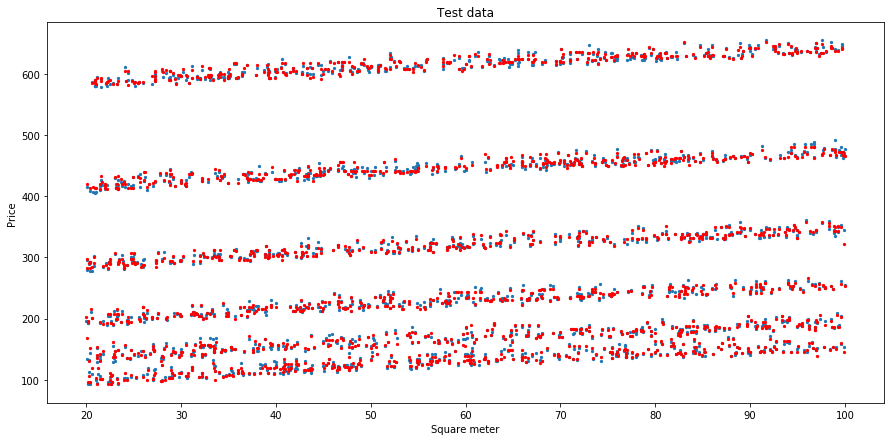

In [545]:
plt.rcParams["figure.figsize"] = (15,7)
print(len(X_test))
print(len(y_test))
print(len(diff))
plt.scatter([ X_test[i][0] for i in range(len(X_test)) ],y_test,s=5)
plt.scatter([ X_test[i][0] for i in range(len(X_test)) ],diff,c="r",s=5)
#plt.legend(["Testing data" , "Predicted value"])
print(sum(y_test))
plt.xlabel("Square meter")
plt.ylabel("Price")
plt.title("Test data")

plt.show()

2000
2000
1
652211.2756876851


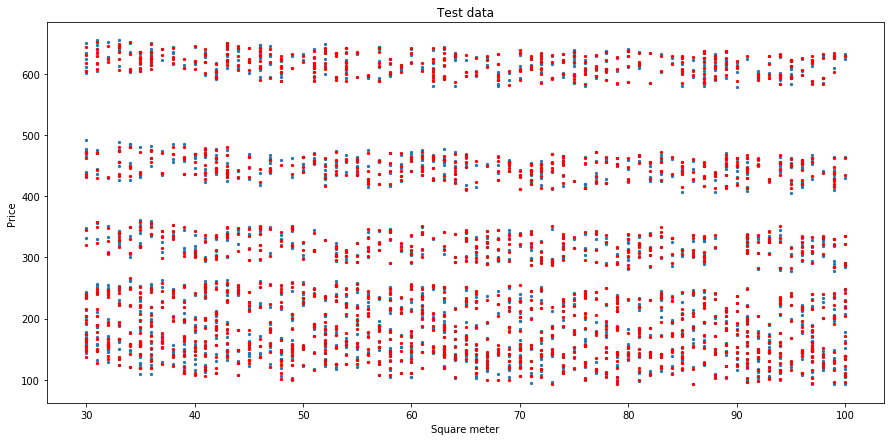

In [546]:
plt.rcParams["figure.figsize"] = (15,7)
print(len(X_test))
print(len(y_test))
print(len(diff))
plt.scatter([ X_test[i][1] for i in range(len(X_test)) ],y_test,s=5)
plt.scatter([ X_test[i][1] for i in range(len(X_test)) ],diff,c="r",s=5)
#plt.legend(["Testing data" , "Predicted value"])
print(sum(y_test))
plt.xlabel("Square meter")
plt.ylabel("Price")
plt.title("Test data")

plt.show()

In [547]:
'''plt.rcParams["figure.figsize"] = (15,7)
plt.scatter(X_test,y_test,)
plt.scatter(X_test,diff[-1],c="r")
plt.legend(["Testing data" , "Predicted value"])
plt.xlabel("Square meter")
plt.ylabel("Price")
plt.title("Worst tree")

plt.show()'''

'plt.rcParams["figure.figsize"] = (15,7)\nplt.scatter(X_test,y_test,)\nplt.scatter(X_test,diff[-1],c="r")\nplt.legend(["Testing data" , "Predicted value"])\nplt.xlabel("Square meter")\nplt.ylabel("Price")\nplt.title("Worst tree")\n\nplt.show()'

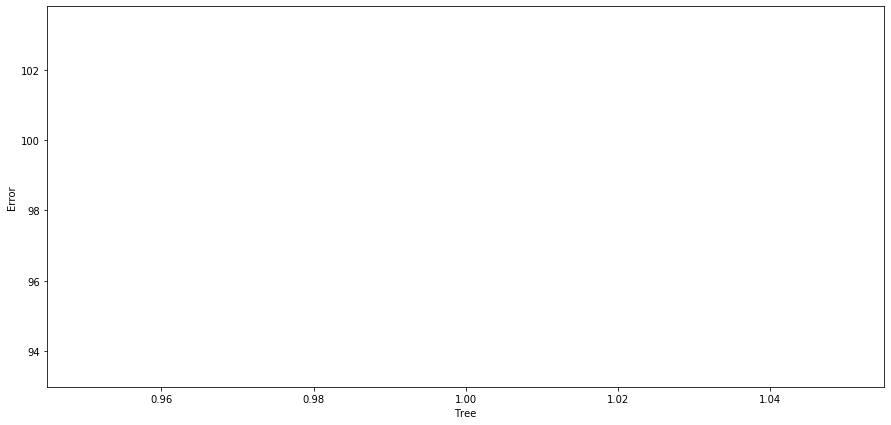

In [548]:

#Error mértéke a mse határáról függően

x = [x for x in range(bottom,top)]

plt.rcParams["figure.figsize"] = (15,7)
plt.plot(x,difference,)

plt.xlabel("Tree")
plt.ylabel("Error")


plt.show()